In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/kaggle/input/iris-data-2/iris_data (1).csv")

In [3]:
df.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [4]:
df.Species.value_counts()

Species
Iris-setosa       50
Iris-virginica    50
Name: count, dtype: int64

In [5]:
# Using a shortcut, the lambda function maps all the values that are Ontario to 1 and the others (Texas) to 0
df["Species"] = df["Species"].apply(lambda x:1 if x == "Iris-setosa" else 0)

df.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


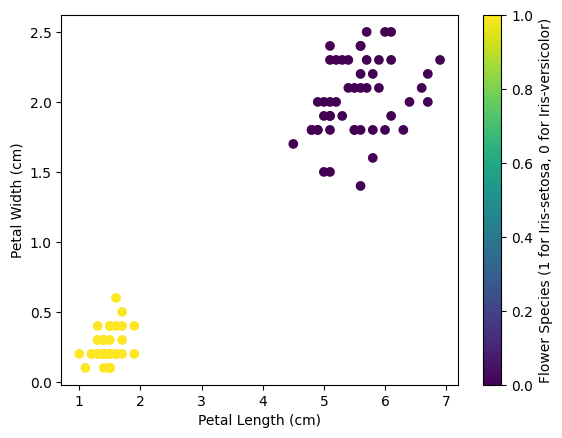

In [6]:
# Plot square feet on the x-axis and housing prices on the y-axis. Using color, the Species will be plotted with 1 as yellow and 0 as purple
plt.scatter(df["PetalLengthCm"], df["PetalWidthCm"], c=df["Species"]) # cmap represents the colour scheme

# Label the axes
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

# Adding a colorbar to show the values of Species (0 or 1)
cbar = plt.colorbar()
cbar.set_label('Flower Species (1 for Iris-setosa, 0 for Iris-versicolor)')

# Display the plot
plt.show()

# By default mathplotlib sets high values with scientific notation --> 1e6 means [y-value] x 10^6

In [7]:
# Split the data into features (x values) and labels (y values)
features = df[["PetalLengthCm", "PetalWidthCm"]]
labels = df[["Species"]]

In [8]:
# Using sklearns train_test_split function, the data will be split the data to use for training (80%) and testing (20%)
features_train, features_test, labels_train, labels_test = train_test_split(features,labels, 
                                                                            train_size=0.8, 
                                                                            test_size=0.2, 
                                                                            random_state=42)

In [9]:
# Declare a linear regression model
model = LinearRegression()
# Use the training data to "fit" the model to it
model.fit(features_train, labels_train)

LinearRegression()

In [10]:
# Create a variable to hold the model predictions of the testing data
predictions = model.predict(features_test)

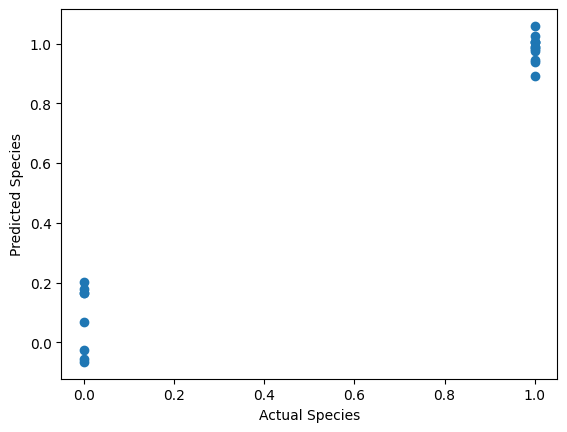

In [11]:
# Plot the real locations and the predictions
plt.scatter(labels_test, predictions)

plt.xlabel("Actual Species")
plt.ylabel("Predicted Species")

plt.show()

In [12]:
print(model.score(features_test, labels_test))


0.9659100563247287
